# Exploratory Data Analysis

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [29]:
sns.set_context('notebook')
sns.set_palette('deep')

## Load data

In [2]:
df = pd.read_csv('../data/interim/loans_interim.csv')

In [3]:
df.head()

,Loan_ID,Channel,Seller_Name,Original_Interest_Rate,Original_UPB,Original_Loan_Term,Origination_Date,First_Payment_Date,LTV,CLTV,...,First_Time_Home_Buyer,Loan_Purpose,Property_Type,Number_of_Units,Occupancy_Status,Property_State,Zip,Mortgage_Insurance_Per,count,foreclosure
0,100002130634,R,Quicken Loans Inc.,4.375,159000.0,360.0,122016.0,22017.0,62.0,62.0,...,N,R,SF,1.0,P,CO,804.0,NaN,30,False
1,100003080256,B,"United Shore Financial Services, Llc Dba Unite...",4.875,94000.0,360.0,22017.0,42017.0,75.0,75.0,...,N,P,SF,2.0,I,CT,60.0,NaN,46,False
2,100003080256,B,"United Shore Financial Services, LLC dba Unite...",4.875,94000.0,360.0,22017.0,42017.0,75.0,75.0,...,N,P,SF,2.0,I,CT,60.0,NaN,46,False
3,100003080256,B,"United Wholesale Mortgage, LLC",4.875,94000.0,360.0,22017.0,42017.0,75.0,75.0,...,N,P,SF,2.0,I,CT,60.0,NaN,46,False
4,100003722619,R,Quicken Loans Inc.,3.875,113000.0,240.0,122016.0,22017.0,75.0,75.0,...,N,C,SF,1.0,I,TN,370.0,NaN,39,False


## Missing values

In [103]:
miss_per = (df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)
miss_per

Mortgage_Insurance_Per      70.541634
Co-Borrower_Credit_Score    53.182316
Borrower_Credit_Score        0.069744
DTI                          0.014530
Zip                          0.000542
Property_State               0.000387
First_Time_Home_Buyer        0.000387
Number_of_Borrowers          0.000387
CLTV                         0.000387
LTV                          0.000387
First_Payment_Date           0.000387
Origination_Date             0.000387
Original_Loan_Term           0.000387
Original_UPB                 0.000387
Original_Interest_Rate       0.000387
Seller_Name                  0.000387
Number_of_Units              0.000387
count                        0.000000
Loan_ID                      0.000000
Occupancy_Status             0.000000
Property_Type                0.000000
Loan_Purpose                 0.000000
Channel                      0.000000
foreclosure                  0.000000
dtype: float64

* Many missing values in Mortgage_Insurance_Per and Co-Borrower_Credit_Score. We may get rid of these features
* Very few missing values on other columns we try to impute them a value

## Features Overview

In [21]:
df.columns

Index(['Loan_ID', 'Channel', 'Seller_Name', 'Original_Interest_Rate',
       'Original_UPB', 'Original_Loan_Term', 'Origination_Date',
       'First_Payment_Date', 'LTV', 'CLTV', 'Number_of_Borrowers', 'DTI',
       'Borrower_Credit_Score', 'Co-Borrower_Credit_Score',
       'First_Time_Home_Buyer', 'Loan_Purpose', 'Property_Type',
       'Number_of_Units', 'Occupancy_Status', 'Property_State', 'Zip',
       'Mortgage_Insurance_Per', 'count', 'foreclosure'],
      dtype='object')

Let's categorize our features as numerical, categorical or date:

* Numerical: 'Original_Interest_Rate', 'LTV', 'CLTV'

* Categorical: 'Channel', 'Seller_Name', 

* Date: 'Origination_Date', 'First_Payment_Date'

### Channel
The origination channel used by the party that delivered the loan to the issuer.

In [26]:
df['Channel'].value_counts()

R    1439965
C     870475
B     270416
Name: Channel, dtype: int64

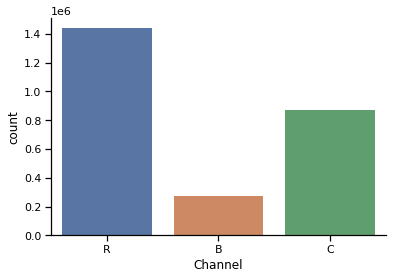

In [32]:
sns.countplot(x='Channel', data=df);
sns.despine()

* Categorical
* Assumes three values: Retail = 'R', Correspondent = 'C', Broker = 'B'
* Most of them are channel R

### Seller_Name
The name of the entity that delivered the mortgage loan to Fannie Mae.

In [34]:
df['Seller_Name'].head()

0                                   Quicken Loans Inc.
1    United Shore Financial Services, Llc Dba Unite...
2    United Shore Financial Services, LLC dba Unite...
3                       United Wholesale Mortgage, LLC
4                                   Quicken Loans Inc.
Name: Seller_Name, dtype: object

In [35]:
df['Seller_Name'].nunique()

55

In [55]:
sellers = (df['Seller_Name'].value_counts()).sort_values(ascending=False)[:10]

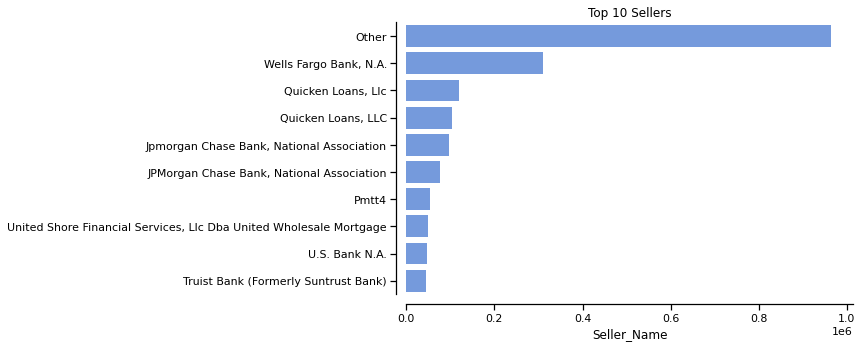

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(sellers, sellers.index, color='cornflowerblue');
plt.title('Top 10 Sellers');
sns.despine(offset=10);

* Categorical
* There 55 sellers categories

### Original_Interest_Rate
The original interest rate on a mortgage loan as identified in the original mortgage note.

In [76]:
df['Original_Interest_Rate'].describe()

count    2.580846e+06
mean     4.136184e+00
std      4.932804e-01
min      1.790000e+00
25%      3.875000e+00
50%      4.125000e+00
75%      4.490000e+00
max      6.125000e+00
Name: Original_Interest_Rate, dtype: float64

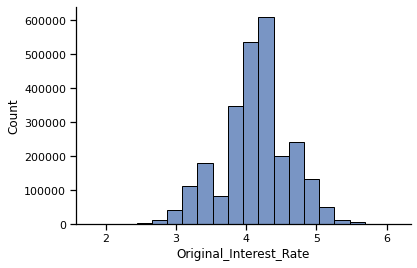

In [75]:
sns.histplot(df['Original_Intdescribet_Rate'], bins=20);
sns.despine()

In [78]:
df['Original_Interest_Rate'].skew(), df['Original_Interest_Rate'].kurtosis()

(-0.18569382709852295, 0.21592025027094186)

* Numerical - Continuous
* Values from 1.79 to 6.12
* Data is fairly simmetrical

### Original_UPB
The dollar amount of the loan as stated on the note at the time the loan was originated.

In [84]:
df['Original_UPB'].describe()

count    2.580846e+06
mean     2.303957e+05
std      1.196219e+05
min      5.000000e+03
25%      1.390000e+05
50%      2.080000e+05
75%      3.020000e+05
max      1.223000e+06
Name: Original_UPB, dtype: float64

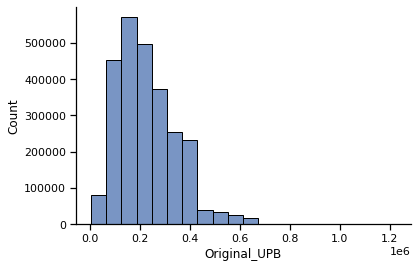

In [80]:
sns.histplot(df['Original_UPB'], bins=20);
sns.despine()

In [82]:
df['Original_UPB'].skew(), df['Original_UPB'].kurtosis()

(0.9169795220433988, 1.0055926411148057)

* Numerical, continuous
* High right skewness 

In [86]:
df.columns

Index(['Loan_ID', 'Channel', 'Seller_Name', 'Original_Interest_Rate',
       'Original_UPB', 'Original_Loan_Term', 'Origination_Date',
       'First_Payment_Date', 'LTV', 'CLTV', 'Number_of_Borrowers', 'DTI',
       'Borrower_Credit_Score', 'Co-Borrower_Credit_Score',
       'First_Time_Home_Buyer', 'Loan_Purpose', 'Property_Type',
       'Number_of_Units', 'Occupancy_Status', 'Property_State', 'Zip',
       'Mortgage_Insurance_Per', 'count', 'foreclosure'],
      dtype='object')

### Original_Loan_Term
For fixed-rate, adjustable-rate and Interest-only mortgages, the number of months in which
regularly scheduled borrower payments are due at the time the loan was originated.

In [89]:
df['Original_Loan_Term'].describe()

count    2.580846e+06
mean     3.207924e+02
std      7.312856e+01
min      3.600000e+01
25%      3.600000e+02
50%      3.600000e+02
75%      3.600000e+02
max      3.600000e+02
Name: Original_Loan_Term, dtype: float64

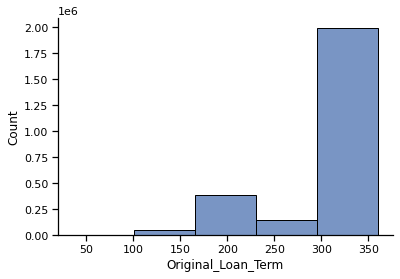

In [93]:
sns.histplot(df['Original_Loan_Term'], bins=5);
sns.despine()

* Numerical, discrete
* Values between 36 to 360 months
* Most loans are > 300

### Origination_Date
The date of each individual note.

In [102]:
df['Origination_Date'].sample(5)

2357239    32017.0
2113512    42017.0
2257       22017.0
1134054    72017.0
2385070    42017.0
Name: Origination_Date, dtype: float64

Date columns need some cleaning

In [98]:
df['Origination_Date'].isna().sum()

10

In [154]:
def process_date(date_str, key):
    """ Parse date string and return month/year value according to key parameter """
    date_str = date_str[:-2] # remove '.0'
    if key == 'month':
        month = date_str[:-4]
        return month
    elif key == 'year':
        year = date_str[-4:]
        return year
    else:
        raise ValueError("invalid key, only accepts 'month' or 'year'")

In [155]:
df['orig_month'] = df['Origination_Date'].astype(str).apply(lambda date: process_date(date, key='month'))
df['orig_year'] = df['Origination_Date'].astype(str).apply(lambda date: process_date(date, key='year'))

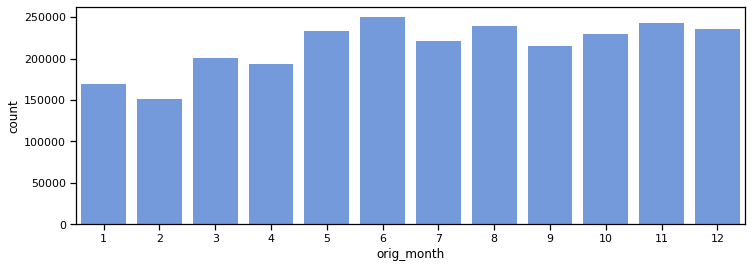

In [170]:
plt.figure(figsize=(12, 4))
sns.countplot(df['orig_month'], color='cornflowerblue', order=np.arange(1, 13).astype('str'));

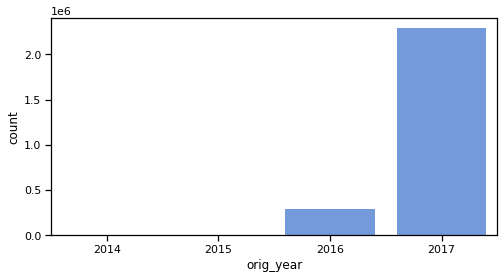

In [169]:
plt.figure(figsize=(8, 4))
sns.countplot(df['orig_year'], color='cornflowerblue', order=np.arange(2014, 2018).astype('str'));

* Date feature
* Has 10 missing values
* Year values are: 2014, 2015, 2016, 2017

### First_Payment_Date
The date of the first scheduled mortgage loan payment to be made by the borrower under the
terms of the mortgage loan documents.

In [173]:
df['first_payment_month'] = df['First_Payment_Date'].astype(str).apply(lambda date: process_date(date, key='month'))
df['first_payment_year'] = df['First_Payment_Date'].astype(str).apply(lambda date: process_date(date, key='year'))

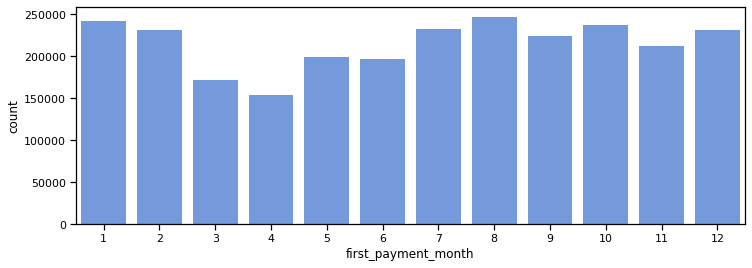

In [175]:
plt.figure(figsize=(12, 4))
sns.countplot(df['first_payment_month'], color='cornflowerblue', order=np.arange(1, 13).astype('str'));

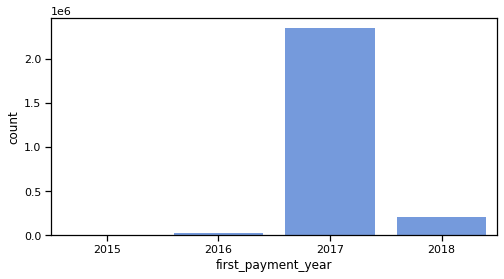

In [178]:
plt.figure(figsize=(8, 4))
sns.countplot(df['first_payment_year'], color='cornflowerblue', order=np.arange(2015, 2019).astype('str'));

* Date feature
* Year values are: 2015, 2016, 2017, 2018

In [181]:
df.columns

Index(['Loan_ID', 'Channel', 'Seller_Name', 'Original_Interest_Rate',
       'Original_UPB', 'Original_Loan_Term', 'Origination_Date',
       'First_Payment_Date', 'LTV', 'CLTV', 'Number_of_Borrowers', 'DTI',
       'Borrower_Credit_Score', 'Co-Borrower_Credit_Score',
       'First_Time_Home_Buyer', 'Loan_Purpose', 'Property_Type',
       'Number_of_Units', 'Occupancy_Status', 'Property_State', 'Zip',
       'Mortgage_Insurance_Per', 'count', 'foreclosure', 'orig_month',
       'orig_year', 'first_payment_month', 'first_payment_year'],
      dtype='object')

### LTV, CLTV
LTV: The ratio, expressed as a percentage, obtained by dividing the amount of the loan at origination by
the value of the property.
\
CLTV: The ratio, expressed as a percentage, obtained by dividing the amount of all known outstanding loans at origination by the value of the property

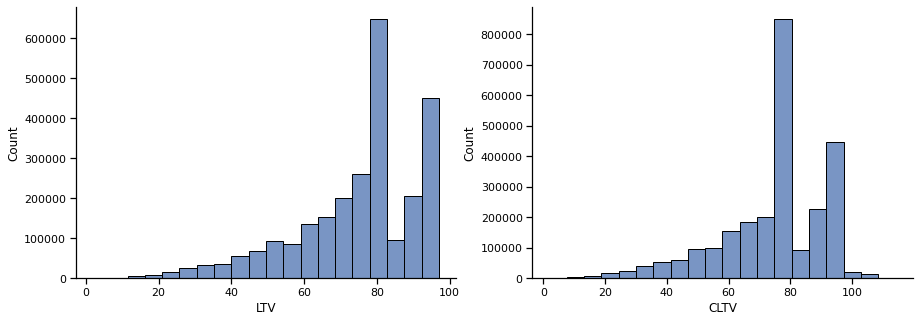

In [191]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['LTV'], ax=axes[0], bins=20);
sns.histplot(df['CLTV'], ax=axes[1], bins=20);
sns.despine()

* Numerical, discrete
* Values between 0 and 100 (percentage)

### Number_of_Borrowers
The number of individuals obligated to repay the mortgage loan.